# Tutorial 5 (Introduction to AI)

# Supervised Learning: further classifiers

# Part 2. Random Forests

Random Forest is a flexible, easy to use machine learning algorithm that often produces, even without hyper-parameter tuning, a good result. It is also one of the most used algorithms, because of its simplicity and the fact that it can be used for both classification and regression tasks (we focus on classification).

The Random Forest approach has proven to be one of the most useful ways to address the issues of overfitting and instability.

The Random Forest approach is based on two concepts, called bagging and subspace sampling. Bagging is the short form for *bootstrap aggregation*. Here we create a multitude of datasets of the same length  drawn from the original dataset with replacement (the *bootstrap* in bagging). We then train a tree model for each of the bootstrapped datasets and take the majority prediction of these models for a unseen query instance as our prediction (the *aggregation* in bagging).

The second concept on which the Random Forest approach is based on is the concept of subspace sampling.  Bagging advanced us towards our goal of having a more powerful model creating more accurate results. Unfortunately it turns out that the bagged models are correlated and hence often relatively equal. That is, based on the correlation they produce similar results. This can be reduced to the fact that the bagging is using the whole feature set (all the descriptive features) for each model.

This problem is circumvented by restricting the features that can be chosen at each decision point. Rather than the full set of features, only a randomly chosen subset of features is available at each decision level (the typical value used is &radic;p, where p is the number of features).  This provides more diversity in the trees produced.

###  Random Forests using sklearn

We will study the sklearn Random Forest classification model RandomForestClassifier.

The first example demonstrate Random Forest with a simple dataset of features of mushroom to classify whether or not they are poisonous or edible.  With the sophisticated implementation in sklearn, this works perfectly.  

Note the encoding of the categorical data into numerical values, which is a pre-processing step that is often required.  Here LabelEncoder is used.

In [ ]:
import pandas as pd
import numpy as np
import os
from pprint import pprint

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#set your path
path = "."

#read in the data as csv
filename_read = os.path.join(path, "mushrooms.csv")
dataset = pd.read_csv(filename_read)

#print(dataset.shape)
#print(dataset[:5])

dataset.columns = ['target','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing',
             'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
             'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population',
             'habitat']

#Encode the feature values which are strings to integers
for label in dataset.columns:
    dataset[label] = LabelEncoder().fit(dataset[label]).transform(dataset[label])

# Create our X and y data
result = []
for x in dataset.columns:
    if x != 'target':
        result.append(x)

X = dataset[result].values
y = dataset['target'].values

#print(X[:5])

#Instantiate the model with 10 trees and entropy as splitting criteria
Random_Forest_model = RandomForestClassifier(n_estimators=10,criterion="entropy")

#Training/testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

#Train the model
Random_Forest_model.fit(X_train, y_train)

#make predictions
y_pred = Random_Forest_model.predict(X_test)

#print(y_pred[:5])
#print(y_test[:5])

#Calculate accuracy metric
accuracy = accuracy_score(y_pred, y_test)
print('The accuracy is: ',accuracy*100,'%')

The accuracy is:  100.0 %


Now consider using Random Forest with the digits dataset.  The code builds a Random Forest based on a varying number of trees, and plots the result.  Observe that the accuracy increase rapidly with the first few additional trees, slows and then more or less stabilises at about 70.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import style

digits = load_digits()

print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


[0.7644444444444445, 0.78, 0.8311111111111111, 0.9044444444444445, 0.9133333333333333, 0.9088888888888889, 0.9222222222222223, 0.9288888888888889, 0.9311111111111111, 0.9333333333333333, 0.9377777777777778, 0.9422222222222222, 0.9355555555555556, 0.9511111111111111, 0.9577777777777777, 0.9533333333333334, 0.9422222222222222, 0.9511111111111111, 0.9733333333333334, 0.9511111111111111, 0.96, 0.96, 0.9577777777777777, 0.9466666666666667, 0.96, 0.9533333333333334, 0.9511111111111111, 0.9644444444444444, 0.9622222222222222, 0.9711111111111111, 0.9577777777777777, 0.9577777777777777, 0.9622222222222222, 0.9711111111111111, 0.9577777777777777, 0.9666666666666667, 0.9622222222222222, 0.9711111111111111, 0.9644444444444444, 0.9666666666666667, 0.96, 0.9688888888888889, 0.96, 0.9666666666666667, 0.9666666666666667, 0.9577777777777777, 0.9644444444444444, 0.9711111111111111, 0.9711111111111111, 0.9533333333333334, 0.96, 0.9666666666666667, 0.9666666666666667, 0.9688888888888889, 0.964444444444444

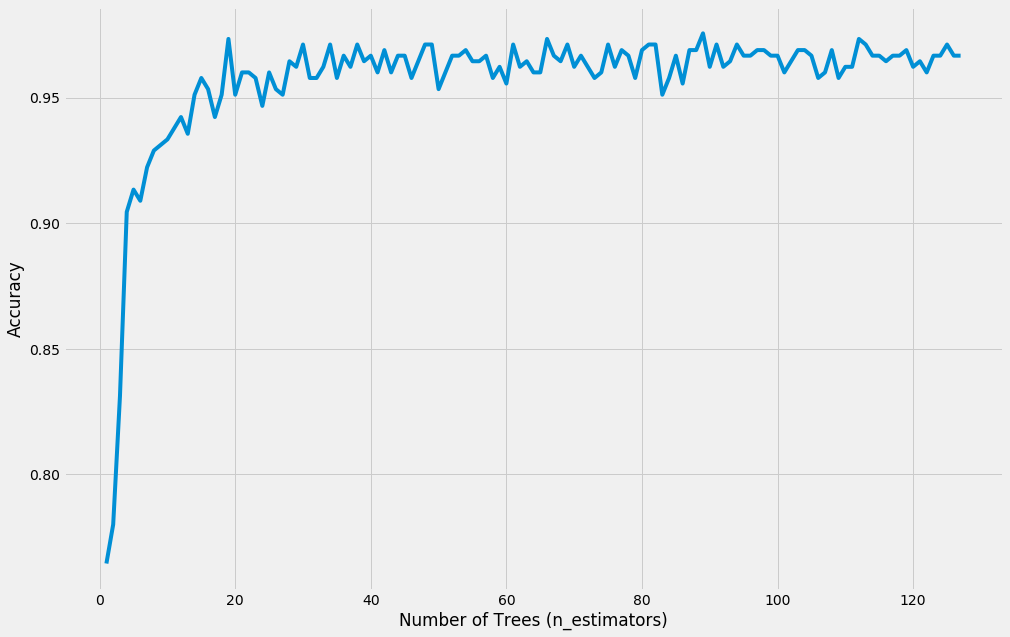

In [ ]:
X = digits.data
y = digits.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=7)

#builds a rf classifier over 128 estimators
#rf_model = RandomForestClassifier(n_estimators=128,criterion="entropy")
#rf_model.fit(Xtrain, ytrain)
#y_model = rf_model.predict(Xtest)

#accuracy = accuracy_score(ytest, y_model)

style.use('fivethirtyeight')

fig = plt.figure(figsize=(15,10))

#investigates the accuracy over a range of estimators plotting the result
#THIS TAKES A WHILE TO RUN!!
accuracy_data = []
nums = []
for i in range(1,128):
    rf_model = RandomForestClassifier(n_estimators=i,criterion="entropy")
    rf_model.fit(Xtrain, ytrain)
    y_model = rf_model.predict(Xtest)
    accuracy = accuracy_score(ytest, y_model)
    accuracy_data.append(accuracy)
    nums.append(i)

print(accuracy_data)
plt.plot(nums,accuracy_data)
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.show()